In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#import pandas.testing as tm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [3]:
df.shape


(19735, 29)

In [4]:
df.head(19735)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [5]:
simple_linear_reg_df = df[['T2', 'T6']].sample(15,random_state=2)

In [6]:
simple_linear_reg_df

,T2,T6
1117,17.426667,-4.238889
16275,22.760000,14.690000
13272,21.230000,8.926667
3160,21.100000,7.690000
19210,21.856667,10.800000
8260,17.356667,5.000000
12299,19.000000,5.300000
13505,22.700000,17.133333
12913,19.593333,7.545000
17788,21.890000,9.190000


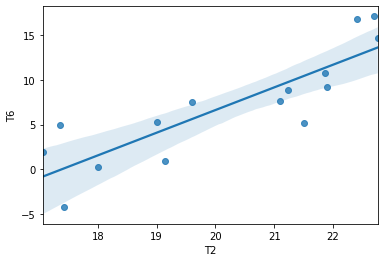

In [7]:
sns.regplot(x="T2", y="T6", data=simple_linear_reg_df)

In [13]:
scaler=MinMaxScaler()


In [16]:
less_date=df.drop(columns=['date'])

In [18]:
normalised_df=pd.DataFrame(scaler.fit_transform(less_date),columns=less_date.columns)

In [20]:
features_df = normalised_df.drop(columns=['T2', 'T6'])
target = normalised_df['T6']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(features_df,target, test_size=0.3, random_state=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=1)

In [22]:
linear_model = LinearRegression()

In [23]:
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
predicted_values = linear_model.predict(x_test)

In [25]:
mae=mean_absolute_error(y_test,predicted_values)

In [26]:
round(mae, 2)

0.02

In [27]:
r2_score=r2_score(y_test,predicted_values)

In [28]:
round(r2_score,2)

0.97

In [29]:
rss =np.sum(np.square(y_test-predicted_values))

In [39]:
round(rss,2)

5.99

In [31]:
rmse=np.sqrt(mean_squared_error(y_test,predicted_values))

In [32]:
round(rmse, 3)

0.032

In [33]:
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
def get_weights_df(model, feat, col_name):
  weights=pd.Series(model.coef_,feat.columns).sort_values()
  weights_df=pd.DataFrame(weights).reset_index()
  weights_df.columns=['Features',col_name]
  weights_df[col_name].round(3)
  return weights_df

In [36]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg,x_train,'Ridge_weight')
lasso_weights_df = get_weights_df(lasso_reg,x_train, 'Lasso_weight')

In [37]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [38]:
final_weights

,Features,Linear_Model_Weight,Ridge_weight,Lasso_weight
0,RH_2,-0.246946,-0.249487,-0.000000
1,RH_6,-0.103845,-0.100405,-0.056971
2,Tdewpoint,-0.088617,0.014102,0.038122
3,T5,-0.073595,-0.068276,-0.000000
4,T7,-0.065550,-0.062987,-0.000000
5,RH_8,-0.065267,-0.061960,0.000000
6,T8,-0.053632,-0.056493,-0.000000
7,T1,-0.048687,-0.047386,-0.000000
8,RH_3,-0.047094,-0.044353,0.000000
9,Press_mm_hg,-0.024325,-0.025551,-0.000000


In [41]:
ridge_reg2 = Ridge(alpha=0.4)
ridge_reg2.fit(x_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
rmse=np.sqrt(mean_squared_error(y_test,predicted_values))